# Neural Networks and Deep Learning
### CA1 - Question 4
### Written by Babak Hosseini Mohtasham 810101408 1403/12

**Table of contents**<a id='toc0_'></a>    
- [Preprocessing](#toc1_)    
- [Autoencoder](#toc2_)    
- [Classification using encoder](#toc3_)    
- [Evaluation](#toc4_)    
- [Improving perfomrance](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
tf.random.set_seed(42)

# <a id='toc1_'></a>[Preprocessing](#toc0_)

In [113]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

(-0.5, 27.5, 27.5, -0.5)

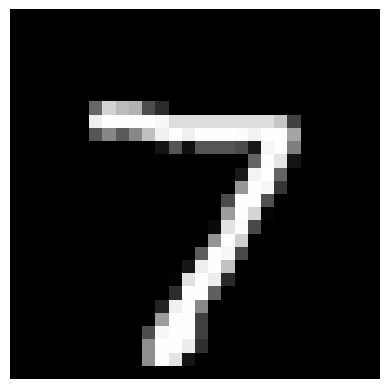

In [114]:
plt.imshow(255-X_test[0], cmap='Greys')
plt.axis('off')

In [115]:
def preprocess(X):
  X = np.array(X, np.float32)
  X = X.reshape(( X.shape[0],-1))
  X /= 255.
  return X

In [116]:
X_train = preprocess(X_train)
X_test = preprocess(X_test)

In [ ]:
X_train.min(), X_train.max(), X_train.shape

(0.0, 1.0, (60000, 784))

# <a id='toc2_'></a>[Autoencoder](#toc0_)

In [ ]:
encoder1 = tf.keras.Sequential([
    layers.Input(shape = (X_train.shape[1],)),
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dense(units = 8, activation = 'relu'),
])

In [ ]:
decoder1 = tf.keras.Sequential([
    layers.Input(shape = (8,)),
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dense(units = 784)
])

In [ ]:
autoencoder1 = tf.keras.models.Sequential([encoder1,decoder1])

In [ ]:
autoencoder1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 8)                   │         101,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 784)                 │         102,288 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,800 (796.09 KB)

 Trainable params: 203,800 (796.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder1.compile(optimizer='adam', loss='mse')
hist1 = autoencoder1.fit(X_train,X_train, batch_size=32, epochs=50, validation_data=(X_test,X_test), verbose=2)

Epoch 1/50
1875/1875 - 16s - 9ms/step - loss: 0.0384 - val_loss: 0.0335
Epoch 2/50
1875/1875 - 14s - 7ms/step - loss: 0.0311 - val_loss: 0.0297
Epoch 3/50
1875/1875 - 18s - 9ms/step - loss: 0.0295 - val_loss: 0.0289
Epoch 4/50
1875/1875 - 18s - 10ms/step - loss: 0.0282 - val_loss: 0.0271
Epoch 5/50
1875/1875 - 9s - 5ms/step - loss: 0.0269 - val_loss: 0.0264
Epoch 6/50
1875/1875 - 8s - 4ms/step - loss: 0.0264 - val_loss: 0.0260
Epoch 7/50
1875/1875 - 10s - 5ms/step - loss: 0.0260 - val_loss: 0.0257
Epoch 8/50
1875/1875 - 10s - 6ms/step - loss: 0.0257 - val_loss: 0.0255
Epoch 9/50
1875/1875 - 10s - 5ms/step - loss: 0.0255 - val_loss: 0.0253
Epoch 10/50
1875/1875 - 9s - 5ms/step - loss: 0.0254 - val_loss: 0.0251
Epoch 11/50
1875/1875 - 8s - 4ms/step - loss: 0.0252 - val_loss: 0.0250
Epoch 12/50
1875/1875 - 9s - 5ms/step - loss: 0.0251 - val_loss: 0.0250
Epoch 13/50
1875/1875 - 9s - 5ms/step - loss: 0.0250 - val_loss: 0.0249
Epoch 14/50
1875/1875 - 10s - 5ms/step - loss: 0.0249 - val_loss:

In [ ]:
encoder2 = tf.keras.Sequential([
    layers.Input(shape = (X_train.shape[1],)),
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dense(units = 4, activation = 'relu'),
])

In [ ]:
decoder2 = tf.keras.Sequential([
    layers.Input(shape = (4,)),
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dense(units = 784)
])

In [ ]:
autoencoder2 = tf.keras.Sequential([encoder2, decoder2])

In [ ]:
autoencoder2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 4)                   │         100,996 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 784)                 │         101,776 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 202,772 (792.08 KB)

 Trainable params: 202,772 (792.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder2.compile(optimizer='adam', loss='mse')
hist2 = autoencoder2.fit(X_train,X_train, batch_size=32, epochs=50, validation_data=(X_test,X_test), verbose=2)

Epoch 1/50
1875/1875 - 10s - 5ms/step - loss: 0.0463 - val_loss: 0.0420
Epoch 2/50
1875/1875 - 9s - 5ms/step - loss: 0.0411 - val_loss: 0.0404
Epoch 3/50
1875/1875 - 9s - 5ms/step - loss: 0.0399 - val_loss: 0.0398
Epoch 4/50
1875/1875 - 9s - 5ms/step - loss: 0.0392 - val_loss: 0.0393
Epoch 5/50
1875/1875 - 11s - 6ms/step - loss: 0.0387 - val_loss: 0.0388
Epoch 6/50
1875/1875 - 9s - 5ms/step - loss: 0.0383 - val_loss: 0.0384
Epoch 7/50
1875/1875 - 9s - 5ms/step - loss: 0.0375 - val_loss: 0.0360
Epoch 8/50
1875/1875 - 9s - 5ms/step - loss: 0.0350 - val_loss: 0.0345
Epoch 9/50
1875/1875 - 9s - 5ms/step - loss: 0.0341 - val_loss: 0.0339
Epoch 10/50
1875/1875 - 10s - 5ms/step - loss: 0.0336 - val_loss: 0.0336
Epoch 11/50
1875/1875 - 9s - 5ms/step - loss: 0.0332 - val_loss: 0.0333
Epoch 12/50
1875/1875 - 10s - 5ms/step - loss: 0.0330 - val_loss: 0.0331
Epoch 13/50
1875/1875 - 9s - 5ms/step - loss: 0.0328 - val_loss: 0.0330
Epoch 14/50
1875/1875 - 9s - 5ms/step - loss: 0.0326 - val_loss: 0.03

In [ ]:
autoencoder1.evaluate(X_test,X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0243


0.024067910388112068

In [ ]:
autoencoder2.evaluate(X_test,X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0323


0.03197021409869194

# <a id='toc3_'></a>[Classification using encoder](#toc0_)

In [ ]:
FF1 = tf.keras.Sequential([
    layers.Input(shape = (8,)),
    layers.Dense(units = 4, activation = 'relu'),
    layers.Dense(units = 10, activation = 'softmax')
])

In [ ]:
FF2 = tf.keras.Sequential([
    layers.Input(shape = (4,)),
    layers.Dense(units = 10, activation = 'softmax')
])

In [ ]:
encoder1.trainable = False
encoder2.trainable = False

In [ ]:
classifier1 = tf.keras.Sequential([encoder1, FF1])

In [ ]:
classifier1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 8)                   │         101,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_6 (Sequential)            │ (None, 10)                  │              86 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,598 (396.87 KB)

 Trainable params: 86 (344.00 B)

 Non-trainable params: 101,512 (396.53 KB)

In [ ]:
classifier2 = tf.keras.Sequential([encoder2, FF2])

In [ ]:
classifier2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 4)                   │         100,996 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_7 (Sequential)            │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,046 (394.71 KB)

 Trainable params: 50 (200.00 B)

 Non-trainable params: 100,996 (394.52 KB)

In [ ]:
classifier1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist3 = classifier1.fit(X_train,y_train, batch_size=32, epochs=50, validation_data=(X_test,y_test), verbose=2)

Epoch 1/50
1875/1875 - 6s - 3ms/step - accuracy: 0.3574 - loss: 1.7926 - val_accuracy: 0.5860 - val_loss: 1.2612
Epoch 2/50
1875/1875 - 4s - 2ms/step - accuracy: 0.6335 - loss: 1.0842 - val_accuracy: 0.6633 - val_loss: 0.9732
Epoch 3/50
1875/1875 - 6s - 3ms/step - accuracy: 0.6881 - loss: 0.8975 - val_accuracy: 0.7032 - val_loss: 0.8388
Epoch 4/50
1875/1875 - 4s - 2ms/step - accuracy: 0.7117 - loss: 0.8056 - val_accuracy: 0.7253 - val_loss: 0.7733
Epoch 5/50
1875/1875 - 4s - 2ms/step - accuracy: 0.7324 - loss: 0.7601 - val_accuracy: 0.7402 - val_loss: 0.7379
Epoch 6/50
1875/1875 - 6s - 3ms/step - accuracy: 0.7451 - loss: 0.7333 - val_accuracy: 0.7552 - val_loss: 0.7157
Epoch 7/50
1875/1875 - 5s - 2ms/step - accuracy: 0.7535 - loss: 0.7155 - val_accuracy: 0.7613 - val_loss: 0.7011
Epoch 8/50
1875/1875 - 6s - 3ms/step - accuracy: 0.7585 - loss: 0.7026 - val_accuracy: 0.7678 - val_loss: 0.6906
Epoch 9/50
1875/1875 - 4s - 2ms/step - accuracy: 0.7635 - loss: 0.6929 - val_accuracy: 0.7711 - 

In [ ]:
classifier2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist4 = classifier2.fit(X_train,y_train, batch_size=32, epochs=50, validation_data=(X_test,y_test), verbose=2)

Epoch 1/50
1875/1875 - 6s - 3ms/step - accuracy: 0.4517 - loss: 1.7365 - val_accuracy: 0.7464 - val_loss: 1.1056
Epoch 2/50
1875/1875 - 4s - 2ms/step - accuracy: 0.7826 - loss: 0.9429 - val_accuracy: 0.7979 - val_loss: 0.8330
Epoch 3/50
1875/1875 - 5s - 3ms/step - accuracy: 0.8045 - loss: 0.7770 - val_accuracy: 0.8114 - val_loss: 0.7373
Epoch 4/50
1875/1875 - 5s - 3ms/step - accuracy: 0.8132 - loss: 0.7074 - val_accuracy: 0.8192 - val_loss: 0.6923
Epoch 5/50
1875/1875 - 4s - 2ms/step - accuracy: 0.8195 - loss: 0.6712 - val_accuracy: 0.8241 - val_loss: 0.6679
Epoch 6/50
1875/1875 - 6s - 3ms/step - accuracy: 0.8235 - loss: 0.6499 - val_accuracy: 0.8260 - val_loss: 0.6532
Epoch 7/50
1875/1875 - 4s - 2ms/step - accuracy: 0.8264 - loss: 0.6361 - val_accuracy: 0.8284 - val_loss: 0.6437
Epoch 8/50
1875/1875 - 4s - 2ms/step - accuracy: 0.8286 - loss: 0.6267 - val_accuracy: 0.8299 - val_loss: 0.6373
Epoch 9/50
1875/1875 - 6s - 3ms/step - accuracy: 0.8302 - loss: 0.6199 - val_accuracy: 0.8313 - 

# <a id='toc4_'></a>[Evaluation](#toc0_)

In [ ]:
def show_predicted_image(model, X):
  prediction = model.predict(X.reshape((1,-1)))
  plt.imshow(255-prediction.reshape((28,28)), cmap='Greys')
  plt.axis('off')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


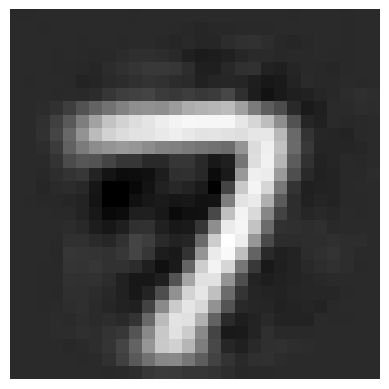

In [ ]:
show_predicted_image(autoencoder1, X_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


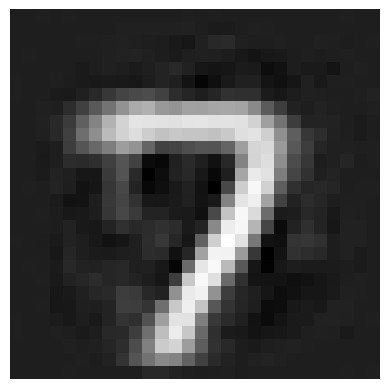

In [ ]:
show_predicted_image(autoencoder2, X_test[0])

In [117]:
def plot_history(history, model, key, limit_y=False):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.title(model+' '+key+' vs epochs')
  plt.ylabel(key)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  if limit_y==True:
    plt.ylim([0.5,1])
  plt.show()

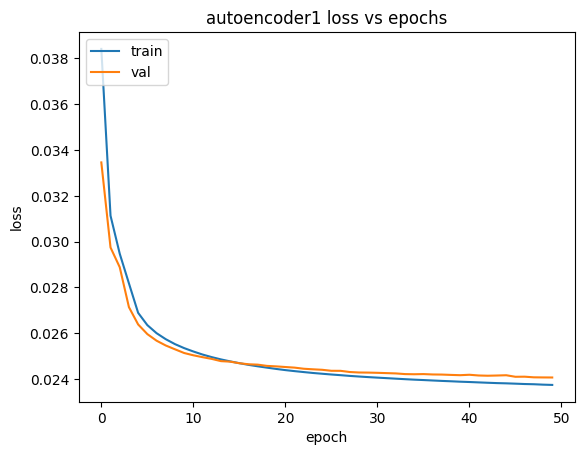

In [ ]:
plot_history(hist1,'autoencoder1','loss')

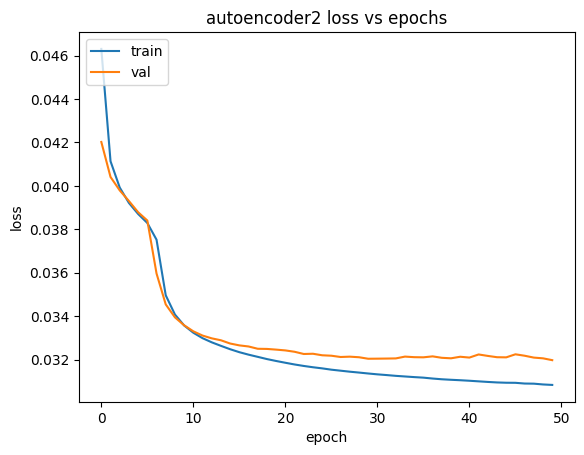

In [ ]:
plot_history(hist2,'autoencoder2','loss')

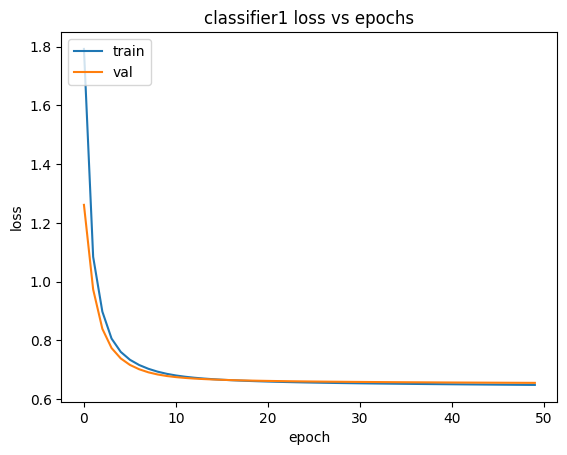

In [ ]:
plot_history(hist3,'classifier1','loss')

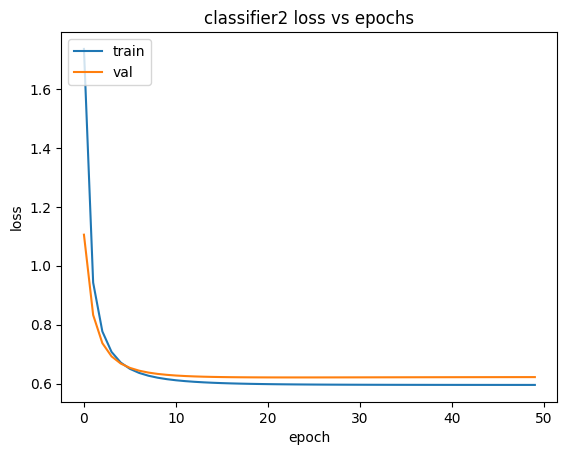

In [ ]:
plot_history(hist4,'classifier2','loss')

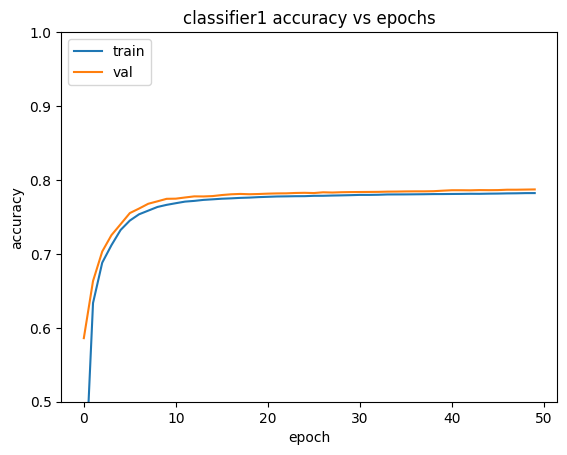

In [ ]:
plot_history(hist3,'classifier1','accuracy', True)

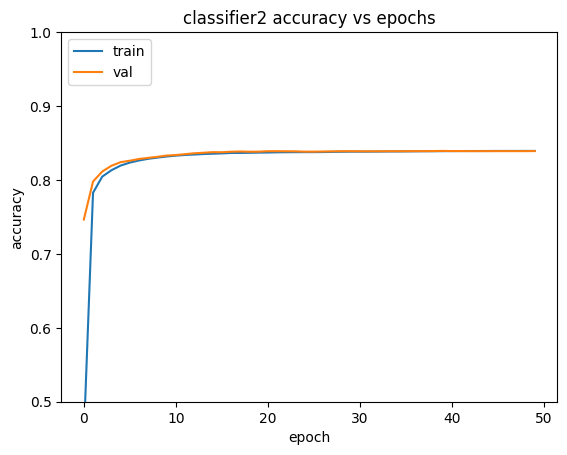

In [ ]:
plot_history(hist4,'classifier2','accuracy', True)

In [ ]:
classifier1.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7580 - loss: 0.7260


[0.6546716690063477, 0.7871999740600586]

In [ ]:
classifier2.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8151 - loss: 0.7034


[0.6219297647476196, 0.8391000032424927]

# <a id='toc5_'></a>[Improving perfomrance](#toc0_)

In [ ]:
encoder3 = tf.keras.Sequential([
    layers.Input(shape = (X_train.shape[1],)),
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 32, activation = 'relu'),
])

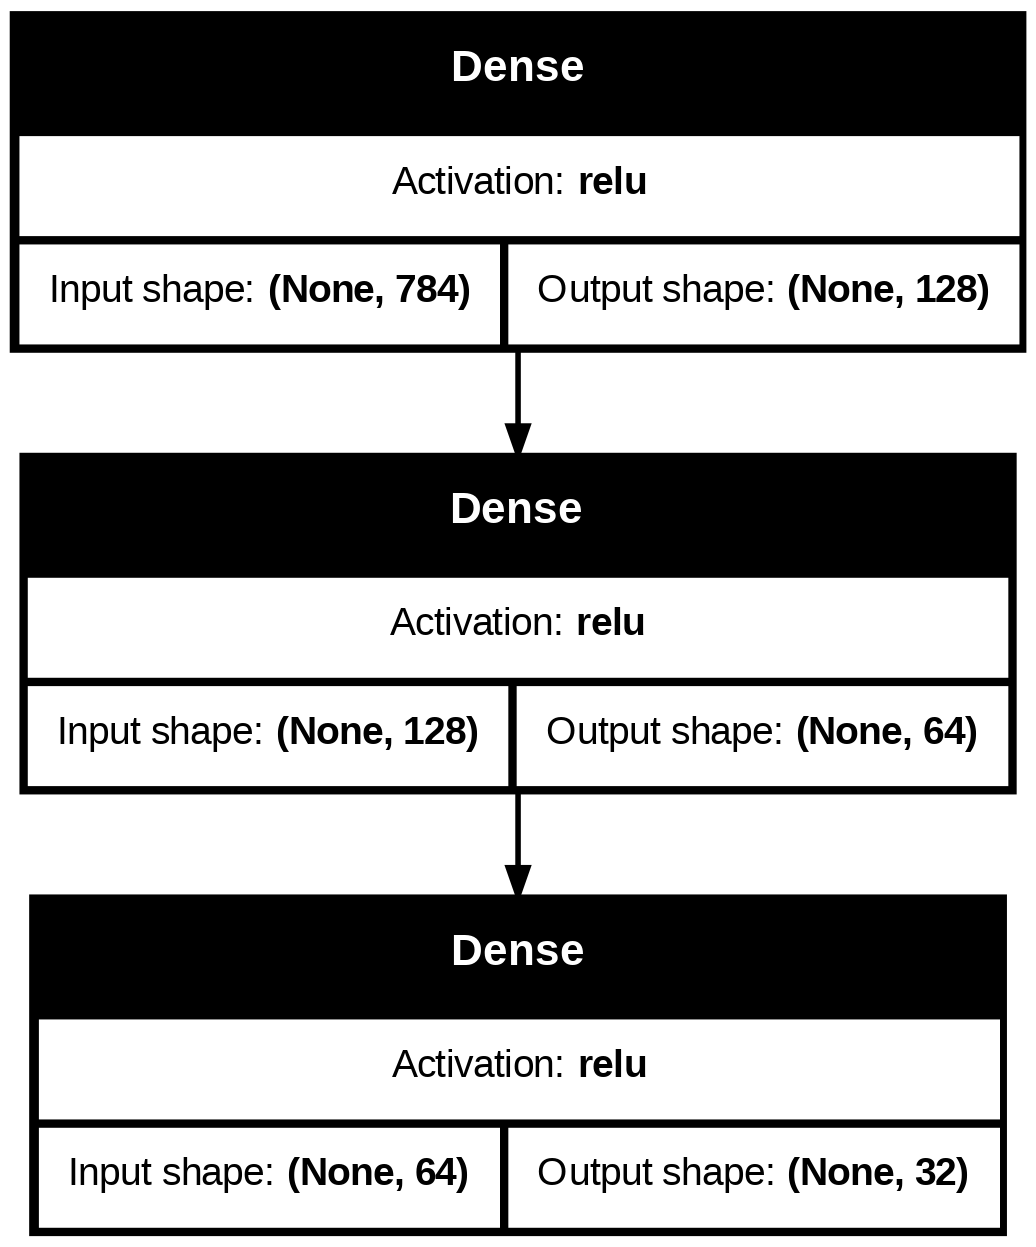

In [ ]:
tf.keras.utils.plot_model(encoder3, show_shapes=True, show_layer_activations=True)

In [ ]:
decoder3 = tf.keras.Sequential([
    layers.Input(shape = (32,)),
    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dense(units = 784)
])

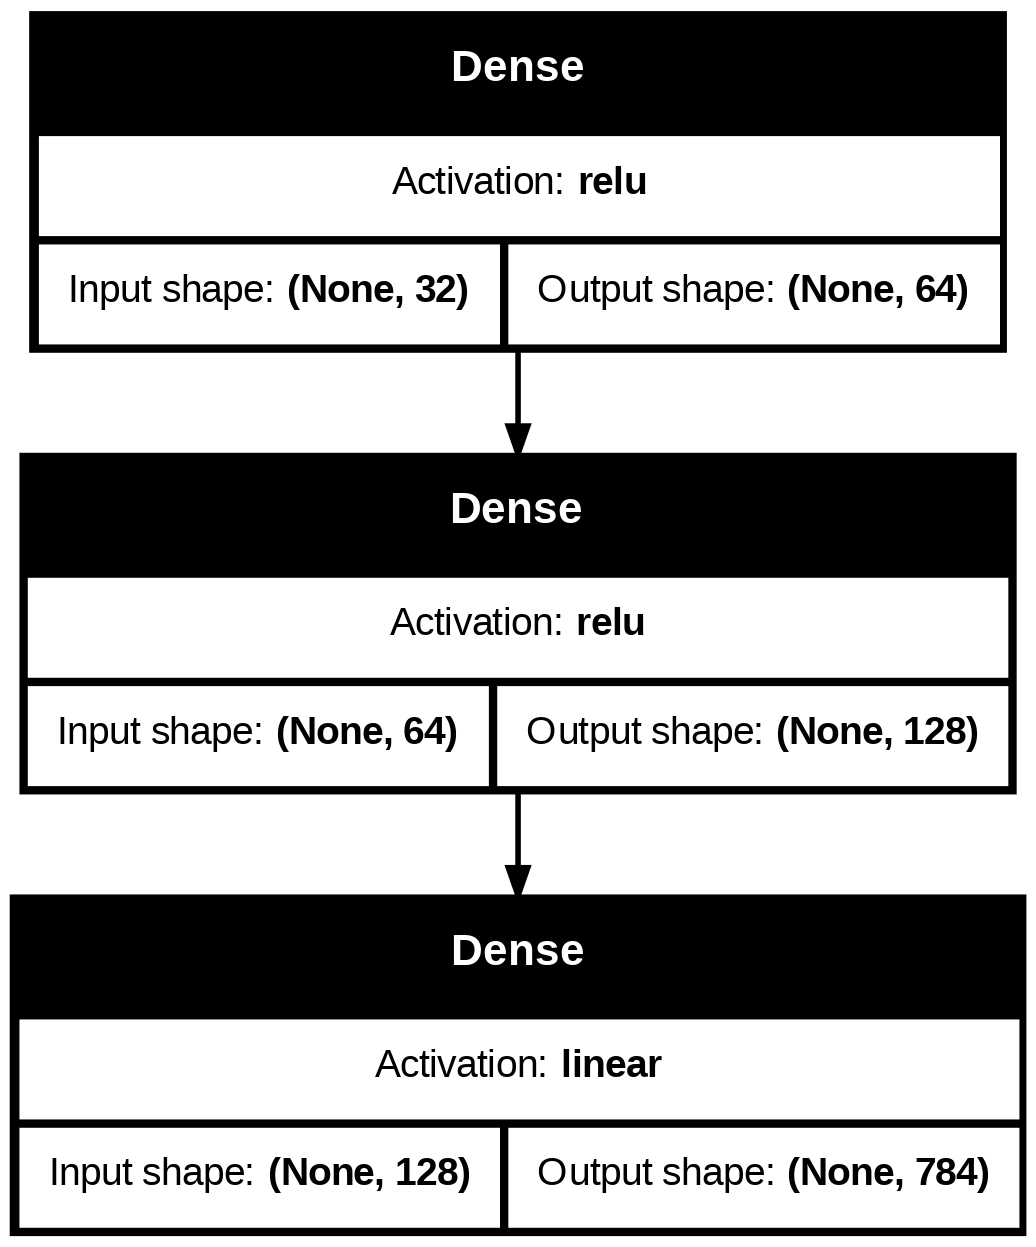

In [ ]:
tf.keras.utils.plot_model(decoder3, show_shapes=True, show_layer_activations=True)

In [ ]:
autoencoder3 = tf.keras.Sequential([encoder3, decoder3])

In [ ]:
autoencoder3.compile(optimizer='adam', loss='mse')
hist5 = autoencoder3.fit(X_train,X_train, batch_size=32, epochs=50, validation_data=(X_test,X_test), verbose=2)

Epoch 1/50
1875/1875 - 12s - 7ms/step - loss: 0.0285 - val_loss: 0.0220
Epoch 2/50
1875/1875 - 11s - 6ms/step - loss: 0.0211 - val_loss: 0.0199
Epoch 3/50
1875/1875 - 10s - 5ms/step - loss: 0.0196 - val_loss: 0.0187
Epoch 4/50
1875/1875 - 10s - 5ms/step - loss: 0.0187 - val_loss: 0.0181
Epoch 5/50
1875/1875 - 11s - 6ms/step - loss: 0.0181 - val_loss: 0.0176
Epoch 6/50
1875/1875 - 20s - 11ms/step - loss: 0.0177 - val_loss: 0.0171
Epoch 7/50
1875/1875 - 10s - 5ms/step - loss: 0.0173 - val_loss: 0.0169
Epoch 8/50
1875/1875 - 10s - 6ms/step - loss: 0.0170 - val_loss: 0.0167
Epoch 9/50
1875/1875 - 10s - 6ms/step - loss: 0.0168 - val_loss: 0.0165
Epoch 10/50
1875/1875 - 19s - 10ms/step - loss: 0.0166 - val_loss: 0.0164
Epoch 11/50
1875/1875 - 11s - 6ms/step - loss: 0.0165 - val_loss: 0.0162
Epoch 12/50
1875/1875 - 10s - 6ms/step - loss: 0.0163 - val_loss: 0.0161
Epoch 13/50
1875/1875 - 10s - 5ms/step - loss: 0.0162 - val_loss: 0.0160
Epoch 14/50
1875/1875 - 9s - 5ms/step - loss: 0.0161 - val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


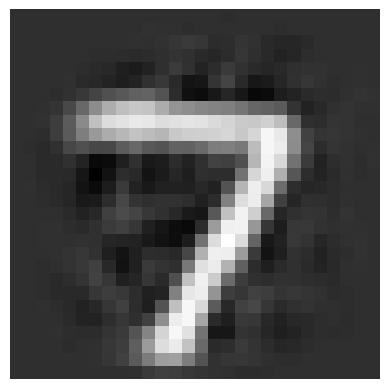

In [ ]:
show_predicted_image(autoencoder3, X_test[0])

In [ ]:
autoencoder3.evaluate(X_test,X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0146


0.014532051049172878

In [ ]:
encoder3.trainable = False

In [ ]:
FF3 = tf.keras.Sequential([
    layers.Input(shape = (32,)),
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dense(units = 10, activation = 'softmax')
])

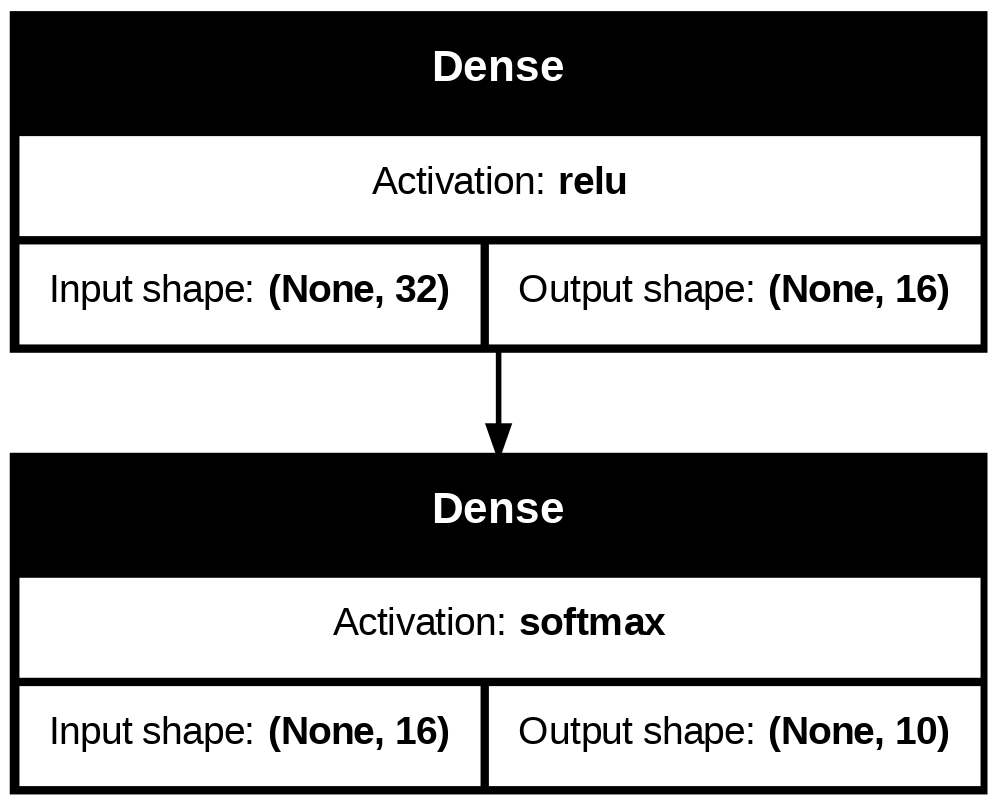

In [ ]:
tf.keras.utils.plot_model(FF3, show_shapes=True, show_layer_activations=True)

In [ ]:
classifier3 = tf.keras.Sequential([encoder3, FF3])

In [ ]:
classifier3.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_14 (Sequential)           │ (None, 32)                  │         110,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_18 (Sequential)           │ (None, 10)                  │             698 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,912 (441.07 KB)

 Trainable params: 698 (2.73 KB)

 Non-trainable params: 110,816 (432.88 KB)

 Optimizer params: 1,398 (5.46 KB)

In [ ]:
classifier3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist6 = classifier3.fit(X_train,y_train, batch_size=32, epochs=50, validation_data=(X_test,y_test), verbose=2)

Epoch 1/50
1875/1875 - 6s - 3ms/step - accuracy: 0.7268 - loss: 0.9389 - val_accuracy: 0.8692 - val_loss: 0.4605
Epoch 2/50
1875/1875 - 4s - 2ms/step - accuracy: 0.8809 - loss: 0.4037 - val_accuracy: 0.8972 - val_loss: 0.3590
Epoch 3/50
1875/1875 - 5s - 3ms/step - accuracy: 0.8970 - loss: 0.3454 - val_accuracy: 0.9040 - val_loss: 0.3263
Epoch 4/50
1875/1875 - 5s - 3ms/step - accuracy: 0.9032 - loss: 0.3216 - val_accuracy: 0.9079 - val_loss: 0.3113
Epoch 5/50
1875/1875 - 5s - 3ms/step - accuracy: 0.9075 - loss: 0.3078 - val_accuracy: 0.9132 - val_loss: 0.3017
Epoch 6/50
1875/1875 - 5s - 3ms/step - accuracy: 0.9100 - loss: 0.2982 - val_accuracy: 0.9155 - val_loss: 0.2949
Epoch 7/50
1875/1875 - 4s - 2ms/step - accuracy: 0.9122 - loss: 0.2911 - val_accuracy: 0.9166 - val_loss: 0.2901
Epoch 8/50
1875/1875 - 5s - 3ms/step - accuracy: 0.9138 - loss: 0.2854 - val_accuracy: 0.9179 - val_loss: 0.2860
Epoch 9/50
1875/1875 - 7s - 4ms/step - accuracy: 0.9153 - loss: 0.2808 - val_accuracy: 0.9188 - 

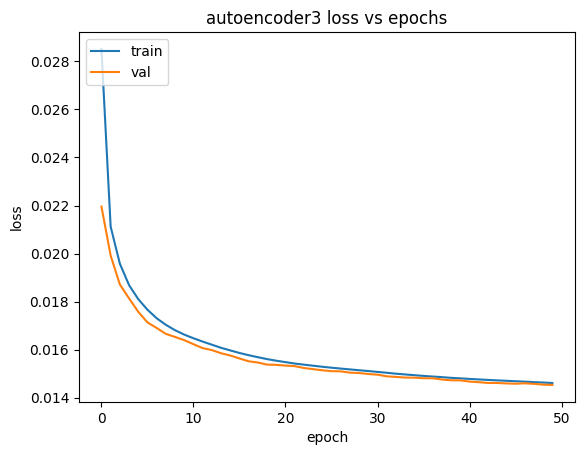

In [ ]:
plot_history(hist5,'autoencoder3','loss')

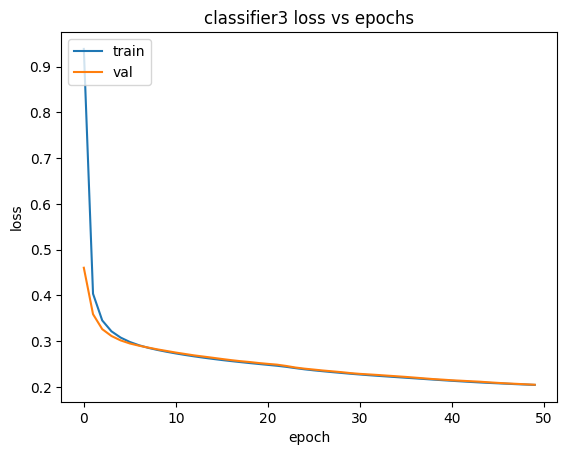

In [ ]:
plot_history(hist6,'classifier3','loss')

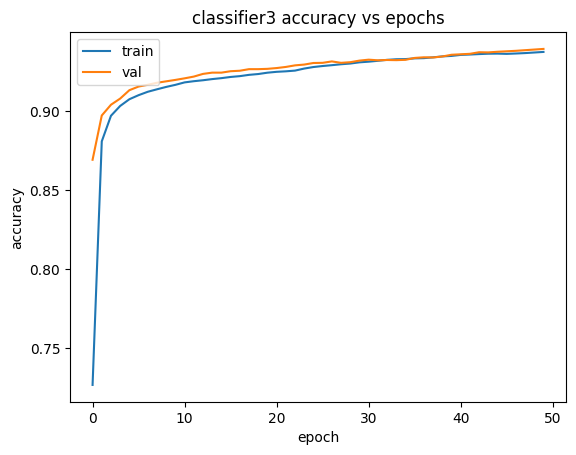

In [ ]:
plot_history(hist6,'classifier3','accuracy')

In [ ]:
classifier3.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9294 - loss: 0.2354


[0.20476475358009338, 0.939300000667572]